In [278]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from category_encoders import TargetEncoder

In [221]:
pd.set_option("display.max_columns" , None)
pd.set_option("display.max_rows" , 50)
plt.style.use('ggplot')


In [222]:
trainingDF_path = "train.csv"
DF_train = pd.read_csv(trainingDF_path)
DF_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,

In [223]:
testingDF_path = "test.csv"
DF_test = pd.read_csv(testingDF_path)
DF_test 


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,Hd

In [224]:
DF_train.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

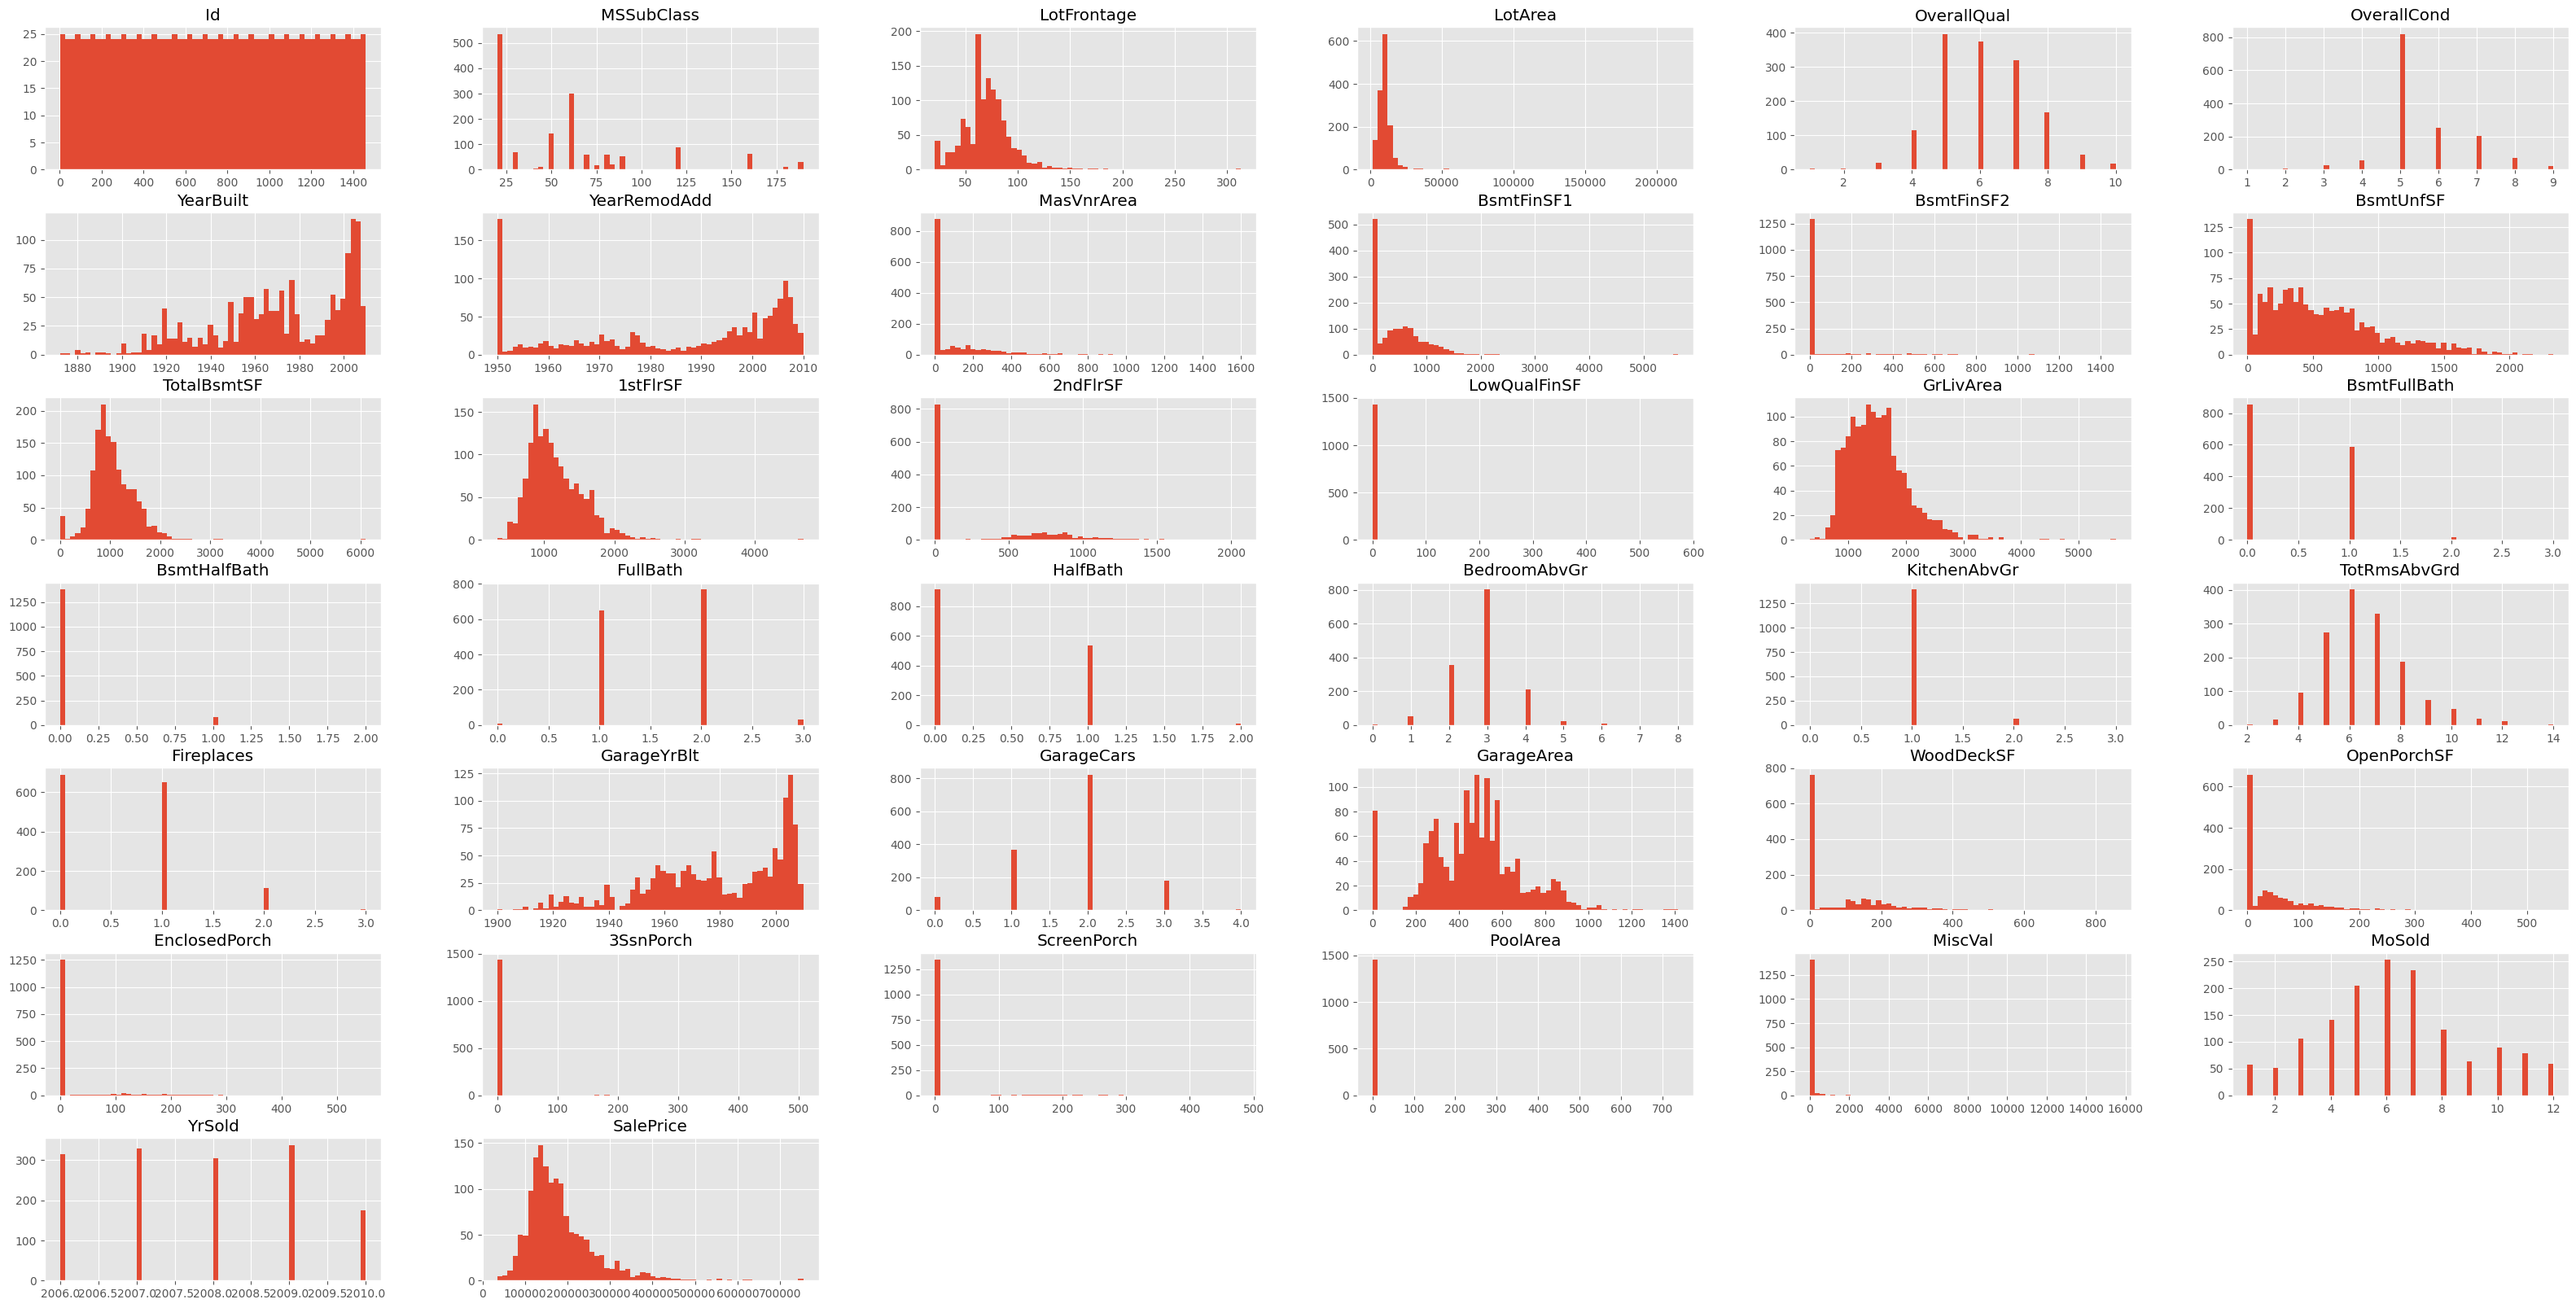

In [225]:
DF_train.hist(bins = 60, figsize = (40,20))
plt.show()

In [226]:
DF_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [227]:
DF_train.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

In [228]:
DF_train.loc[DF_train.duplicated()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [229]:
DF_train.select_dtypes(exclude='object').isna().sum().sort_values(ascending=False)

LotFrontage      259
GarageYrBlt       81
MasVnrArea         8
Id                 0
OpenPorchSF        0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageCars         0
GarageArea         0
WoodDeckSF         0
EnclosedPorch      0
HalfBath           0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
BedroomAbvGr       0
FullBath           0
MSSubClass         0
BsmtFinSF2         0
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
BsmtFinSF1         0
BsmtUnfSF          0
BsmtHalfBath       0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
SalePrice          0
dtype: int64

In [230]:
DF_test.select_dtypes(exclude='object').isna().sum().sort_values(ascending=False)


LotFrontage      227
GarageYrBlt       78
MasVnrArea        15
BsmtHalfBath       2
BsmtFullBath       2
BsmtFinSF2         1
GarageCars         1
GarageArea         1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF1         1
KitchenAbvGr       0
3SsnPorch          0
EnclosedPorch      0
OpenPorchSF        0
WoodDeckSF         0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
Fireplaces         0
TotRmsAbvGrd       0
Id                 0
BedroomAbvGr       0
HalfBath           0
FullBath           0
MSSubClass         0
GrLivArea          0
LowQualFinSF       0
2ndFlrSF           0
1stFlrSF           0
YearRemodAdd       0
YearBuilt          0
OverallCond        0
OverallQual        0
LotArea            0
YrSold             0
dtype: int64

In [231]:
numeric_df = DF_test.select_dtypes(exclude='object')

# 2. Find rows with at least one NaN in numeric columns:
rows_with_nan = numeric_df.isna().any(axis=1)

# 3. Filter the original DataFrame:
df_with_nan_rows = DF_test[rows_with_nan]
df_with_nan_rows.isna().sum().sort_values(ascending=False)

PoolQC           313
MiscFeature      299
Alley            291
Fence            253
LotFrontage      227
                ... 
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
SaleCondition      0
Length: 80, dtype: int64

In [232]:
df_with_nan_rows["MSSubClass"].value_counts()

MSSubClass
20     105
60      69
90      28
50      21
30      15
80      13
120     13
85      13
190     11
70      11
160     10
180      2
75       1
150      1
Name: count, dtype: int64

<Axes: >

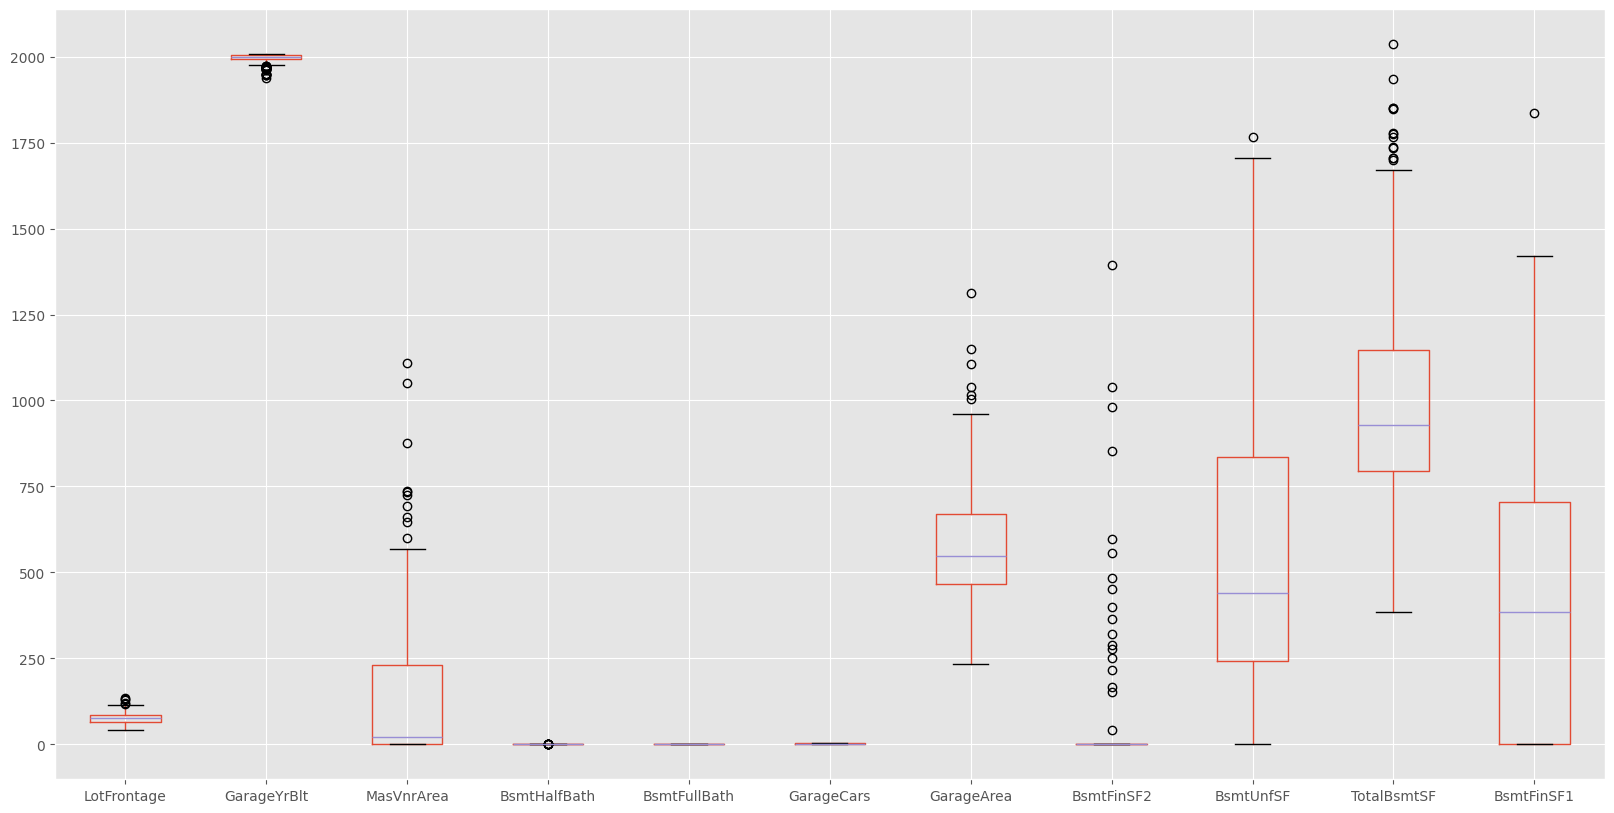

In [233]:
DF_test[["LotFrontage" , "GarageYrBlt", "MasVnrArea", "BsmtHalfBath", "BsmtFullBath", "GarageCars" , "GarageArea", "BsmtFinSF2" , "BsmtUnfSF" , "TotalBsmtSF" , "BsmtFinSF1"]][DF_test['MSSubClass'] == 60].select_dtypes(exclude='object').boxplot(figsize=(20,10))

In [234]:
DF_train.select_dtypes(include='object').isna().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
MasVnrType        872
FireplaceQu       690
GarageType         81
GarageCond         81
GarageQual         81
GarageFinish       81
BsmtFinType2       38
BsmtExposure       38
BsmtFinType1       37
BsmtQual           37
BsmtCond           37
Electrical          1
KitchenQual         0
CentralAir          0
Functional          0
HeatingQC           0
Heating             0
PavedDrive          0
SaleType            0
MSZoning            0
Street              0
Condition2          0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
BldgType            0
Foundation          0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
ExterQual           0
ExterCond           0
SaleCondition       0
dtype: int64

In [235]:
DF_test.select_dtypes(include='object').isna().sum().sort_values(ascending=False)

PoolQC           1456
MiscFeature      1408
Alley            1352
Fence            1169
MasVnrType        894
FireplaceQu       730
GarageCond         78
GarageQual         78
GarageFinish       78
GarageType         76
BsmtCond           45
BsmtQual           44
BsmtExposure       44
BsmtFinType2       42
BsmtFinType1       42
MSZoning            4
Utilities           2
Functional          2
Exterior2nd         1
KitchenQual         1
SaleType            1
Exterior1st         1
LotShape            0
LandContour         0
PavedDrive          0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
Electrical          0
CentralAir          0
HeatingQC           0
Heating             0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Street              0
Foundation          0
ExterCond           0
ExterQual           0
SaleCondition       0
dtype: int64

In [236]:
# Find columns with missing values in DF_train (object types)
train_missing_obj = DF_train.select_dtypes(exclude='object').isna().sum()
train_missing_obj = train_missing_obj[train_missing_obj > 0]  # Filter for columns with at least one missing value
train_missing_features = list(train_missing_obj.index)

# Find columns with missing values in DF_test (object types)
test_missing_obj = DF_test.select_dtypes(exclude='object').isna().sum()
test_missing_obj = test_missing_obj[test_missing_obj > 0]  # Filter for columns with at least one missing value
test_missing_features = list(test_missing_obj.index)

# Compare the lists of features
common_missing_features = set(train_missing_features) & set(test_missing_features) 

# Print the results
print("Features with missing values in DF_train (object types):", train_missing_features)
print("Features with missing values in DF_test (object types):", test_missing_features)
print("Common features with missing values in both:", list(common_missing_features)) 

# Optional: Check if the lists are identical
if set(train_missing_features) == set(test_missing_features):
    print("The features with missing values are the same in both training and testing DataFrames.")
else:
    print("The features with missing values are NOT the same in training and testing DataFrames.")

Features with missing values in DF_train (object types): ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
Features with missing values in DF_test (object types): ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea']
Common features with missing values in both: ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
The features with missing values are NOT the same in training and testing DataFrames.


In [237]:
Numerical_DF_train = DF_train.select_dtypes(exclude='object')
Numerical_DF_test = DF_test.select_dtypes(exclude='object')
Numerical_DF_train

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125


In [238]:
['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea']

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea']

In [239]:
Numerical_DF_test.groupby('MSSubClass')['LotFrontage'].agg(['mean', 'median', 'max' , 'min'])

,mean,median,max,min
MSSubClass,,,,
20,77.862144,75.0,200.0,38.0
30,61.555556,60.0,118.0,46.0
40,58.500000,58.5,62.0,55.0
45,56.666667,50.5,85.0,40.0
50,62.350746,60.0,124.0,40.0
60,76.858491,75.0,134.0,41.0
70,62.935484,60.0,120.0,35.0
75,67.000000,65.0,84.0,53.0
80,77.510638,75.0,140.0,42.0


In [240]:
Numerical_DF_train.isna().sum().sort_values(ascending=False)

LotFrontage      259
GarageYrBlt       81
MasVnrArea         8
Id                 0
OpenPorchSF        0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageCars         0
GarageArea         0
WoodDeckSF         0
EnclosedPorch      0
HalfBath           0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
BedroomAbvGr       0
FullBath           0
MSSubClass         0
BsmtFinSF2         0
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
BsmtFinSF1         0
BsmtUnfSF          0
BsmtHalfBath       0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
SalePrice          0
dtype: int64

In [241]:
numerical_features = Numerical_DF_train.columns

# Iterate through each numerical feature
for feature in numerical_features:
    # Group by 'MSSubClass' and calculate the median within each group
    medians_by_mssc = Numerical_DF_train.groupby('MSSubClass')[feature].transform('median')
    
    # Fill NaN values in the feature with the corresponding group median
    Numerical_DF_train[feature] = Numerical_DF_train[feature].fillna(medians_by_mssc) 
    
    medians_by_mssc = DF_train.groupby('BldgType')[feature].transform('median')
    
    # Fill NaN values in the feature with the corresponding group median
    Numerical_DF_train[feature] = DF_train[feature].fillna(medians_by_mssc)

In [242]:
numerical_features = Numerical_DF_test.columns

# Iterate through each numerical feature
for feature in numerical_features:
    # Group by 'MSSubClass' and calculate the median within each group
    medians_by_mssc = Numerical_DF_test.groupby('MSSubClass')[feature].transform('median')
    
    # Fill NaN values in the feature with the corresponding group median
    Numerical_DF_test[feature] = Numerical_DF_test[feature].fillna(medians_by_mssc)

    medians_by_mssc = DF_test.groupby('BldgType')[feature].transform('median')
    
    # Fill NaN values in the feature with the corresponding group median
    Numerical_DF_test[feature] = DF_test[feature].fillna(medians_by_mssc)

In [243]:

Numerical_DF_train.isna().sum().sort_values(ascending=False)

Id               0
WoodDeckSF       0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
OpenPorchSF      0
MSSubClass       0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
HalfBath         0
FullBath         0
BsmtHalfBath     0
BsmtFullBath     0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
SalePrice        0
dtype: int64

In [244]:

Numerical_DF_test.isna().sum().sort_values(ascending=False)

Id               0
FullBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
HalfBath         0
BsmtHalfBath     0
MSSubClass       0
BsmtFullBath     0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
YrSold           0
dtype: int64

In [245]:
Numerical_DF_train.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [246]:
Numerical_DF_test[Numerical_DF_test['LotFrontage'].isnull()]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold


In [247]:
DF_train['BldgType'].isna().sum()

0

In [248]:
DF_test.groupby('BldgType')['LotFrontage'].agg(['mean', 'median', 'max' , 'min'])

,mean,median,max,min
BldgType,,,,
1Fam,73.331349,70.0,200.0,35.0
2fmCon,69.225806,60.0,195.0,41.0
Duplex,70.044444,70.0,120.0,33.0
Twnhs,24.019608,24.0,36.0,21.0
TwnhsE,41.752577,41.0,135.0,21.0


In [249]:

Numerical_DF_train['YrSold'].value_counts()

YrSold
2009    338
2007    329
2006    314
2008    304
2010    175
Name: count, dtype: int64

In [250]:
numerical_features

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [251]:
Numerical_DF_train = Numerical_DF_train.drop(['Id'], axis = 1)
Numerical_DF_train = Numerical_DF_train.drop(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF'], axis = 1)  # keep only the TotalBsmtSF
Numerical_DF_train = Numerical_DF_train.drop(['1stFlrSF', '2ndFlrSF','LowQualFinSF'], axis = 1) # keep only GrLivArea feature
Numerical_DF_train = Numerical_DF_train.drop(['BsmtFullBath', 'BsmtHalfBath', 'HalfBath'], axis = 1) # keep only the full number of rooms (kitche / bedrooms above Grade)
Numerical_DF_train = Numerical_DF_train.drop(['MoSold'], axis = 1) # keep only the year sold

# YearBuilt , "YearRemodAdd", 'GarageYrBlt', 'YrSold'  think to transform those into ages features
Numerical_DF_train['AgeSold'] = Numerical_DF_train['YrSold'] - \
                                Numerical_DF_train['YearBuilt']
                                
Numerical_DF_train['Valueable_indice'] = (Numerical_DF_train['GrLivArea'] * 
                                         ((Numerical_DF_train['OverallCond'] + Numerical_DF_train['OverallQual']) / 2) ** 2) / \
                                         np.where(Numerical_DF_train['AgeSold'] == 0, 1, Numerical_DF_train['AgeSold'])
                                         
# Calculate the difference between 'YearRemodAdd' and 'YearBuilt'
Numerical_DF_train['RemodBoolean'] = Numerical_DF_train['YearRemodAdd'] - Numerical_DF_train['YearBuilt']
Numerical_DF_train['RemodBoolean'] = Numerical_DF_train['RemodBoolean'].apply(lambda x: 0 if x == 0 else 1)

# Calculate the difference between 'YearRemodAdd' and 'YearBuilt'
Numerical_DF_train['GarageBuiltFromStart'] = Numerical_DF_train['GarageYrBlt'] - Numerical_DF_train['YearBuilt']
Numerical_DF_train['GarageBuiltFromStart'] = Numerical_DF_train['GarageBuiltFromStart'].apply(lambda x: 0 if x == 0 else 1)

# Create "PorchSF" by summing the porch columns
Numerical_DF_train['PorchSF'] = Numerical_DF_train['OpenPorchSF'] + \
                                 Numerical_DF_train['EnclosedPorch'] + \
                                 Numerical_DF_train['3SsnPorch'] + \
                                 Numerical_DF_train['ScreenPorch']

# 5. Drop the original edited columns
Numerical_DF_train = Numerical_DF_train.drop(['OpenPorchSF', 'EnclosedPorch', 
                                              '3SsnPorch', 'ScreenPorch',
                                              'YearRemodAdd' , 'YearBuilt', 'GarageYrBlt', 'YrSold' ], axis=1)

In [252]:
Numerical_DF_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,TotalBsmtSF,GrLivArea,FullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,PoolArea,MiscVal,SalePrice,AgeSold,Valueable_indice,RemodBoolean,GarageBuiltFromStart,PorchSF
0,60,65.0,8450,7,5,196.0,856,1710,2,3,1,8,0,2,548,0,0,0,208500,5,12312.000000,0,0,61
1,20,80.0,9600,6,8,0.0,1262,1262,2,3,1,6,1,2,460,298,0,0,181500,31,1994.774194,0,0,0
2,60,68.0,11250,7,5,162.0,920,1786,2,3,1,6,1,2,608,0,0,0,223500,7,9185.142857,1,0,42
3,70,60.0,9550,7,5,0.0,756,1717,1,3,1,7,1,3,642,0,0,0,140000,91,679.252747,1,1,307
4,60,84.0,14260,8,5,350.0,1145,2198,2,4,1,9,1,3,836,192,0,0,250000,8,11608.187500,0,0,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,0.0,953,1647,2,3,1,7,1,2,460,0,0,0,175000,8,6227.718750,1,0,40
1456,20,85.0,13175,6,6,119.0,1542,2073,2,3,1,7,2,2,500,349,0,0,210000,32,2332.125000,1,0,0
1457,70,66.0,9042,7,9,0.0,1152,2340,2,4,1,9,2,1,252,0,0,2500,266500,69,2170.434783,1,0,60
1458,20,68.0,9717,5,6,0.0,1078,1078,1,2,1,5,0,1,240,366,0,0,142125,60,543.491667,1,0,112


In [ ]:
features_to_transform_withLog = ['LotFrontage', 'LotArea', 'MasVnrArea', 'TotalBsmtSF', 'GrLivArea', 'GarageArea','WoodDeckSF', 'PorchSF', 'PoolArea', 'MiscVal' ,'SalePrice']
for feature in features_to_transform_withLog:
   Numerical_DF_train[feature] = Numerical_DF_train[feature].replace(0, 1)
   Numerical_DF_train[feature] = np.log(Numerical_DF_train[feature])

In [ ]:
Numerical_DF_train = Numerical_DF_train[['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'GrLivArea', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'PoolArea', 'MiscVal',  'AgeSold', 'RemodBoolean', 'GarageBuiltFromStart', 'PorchSF', 'Valueable_indice' , 'SalePrice',]]

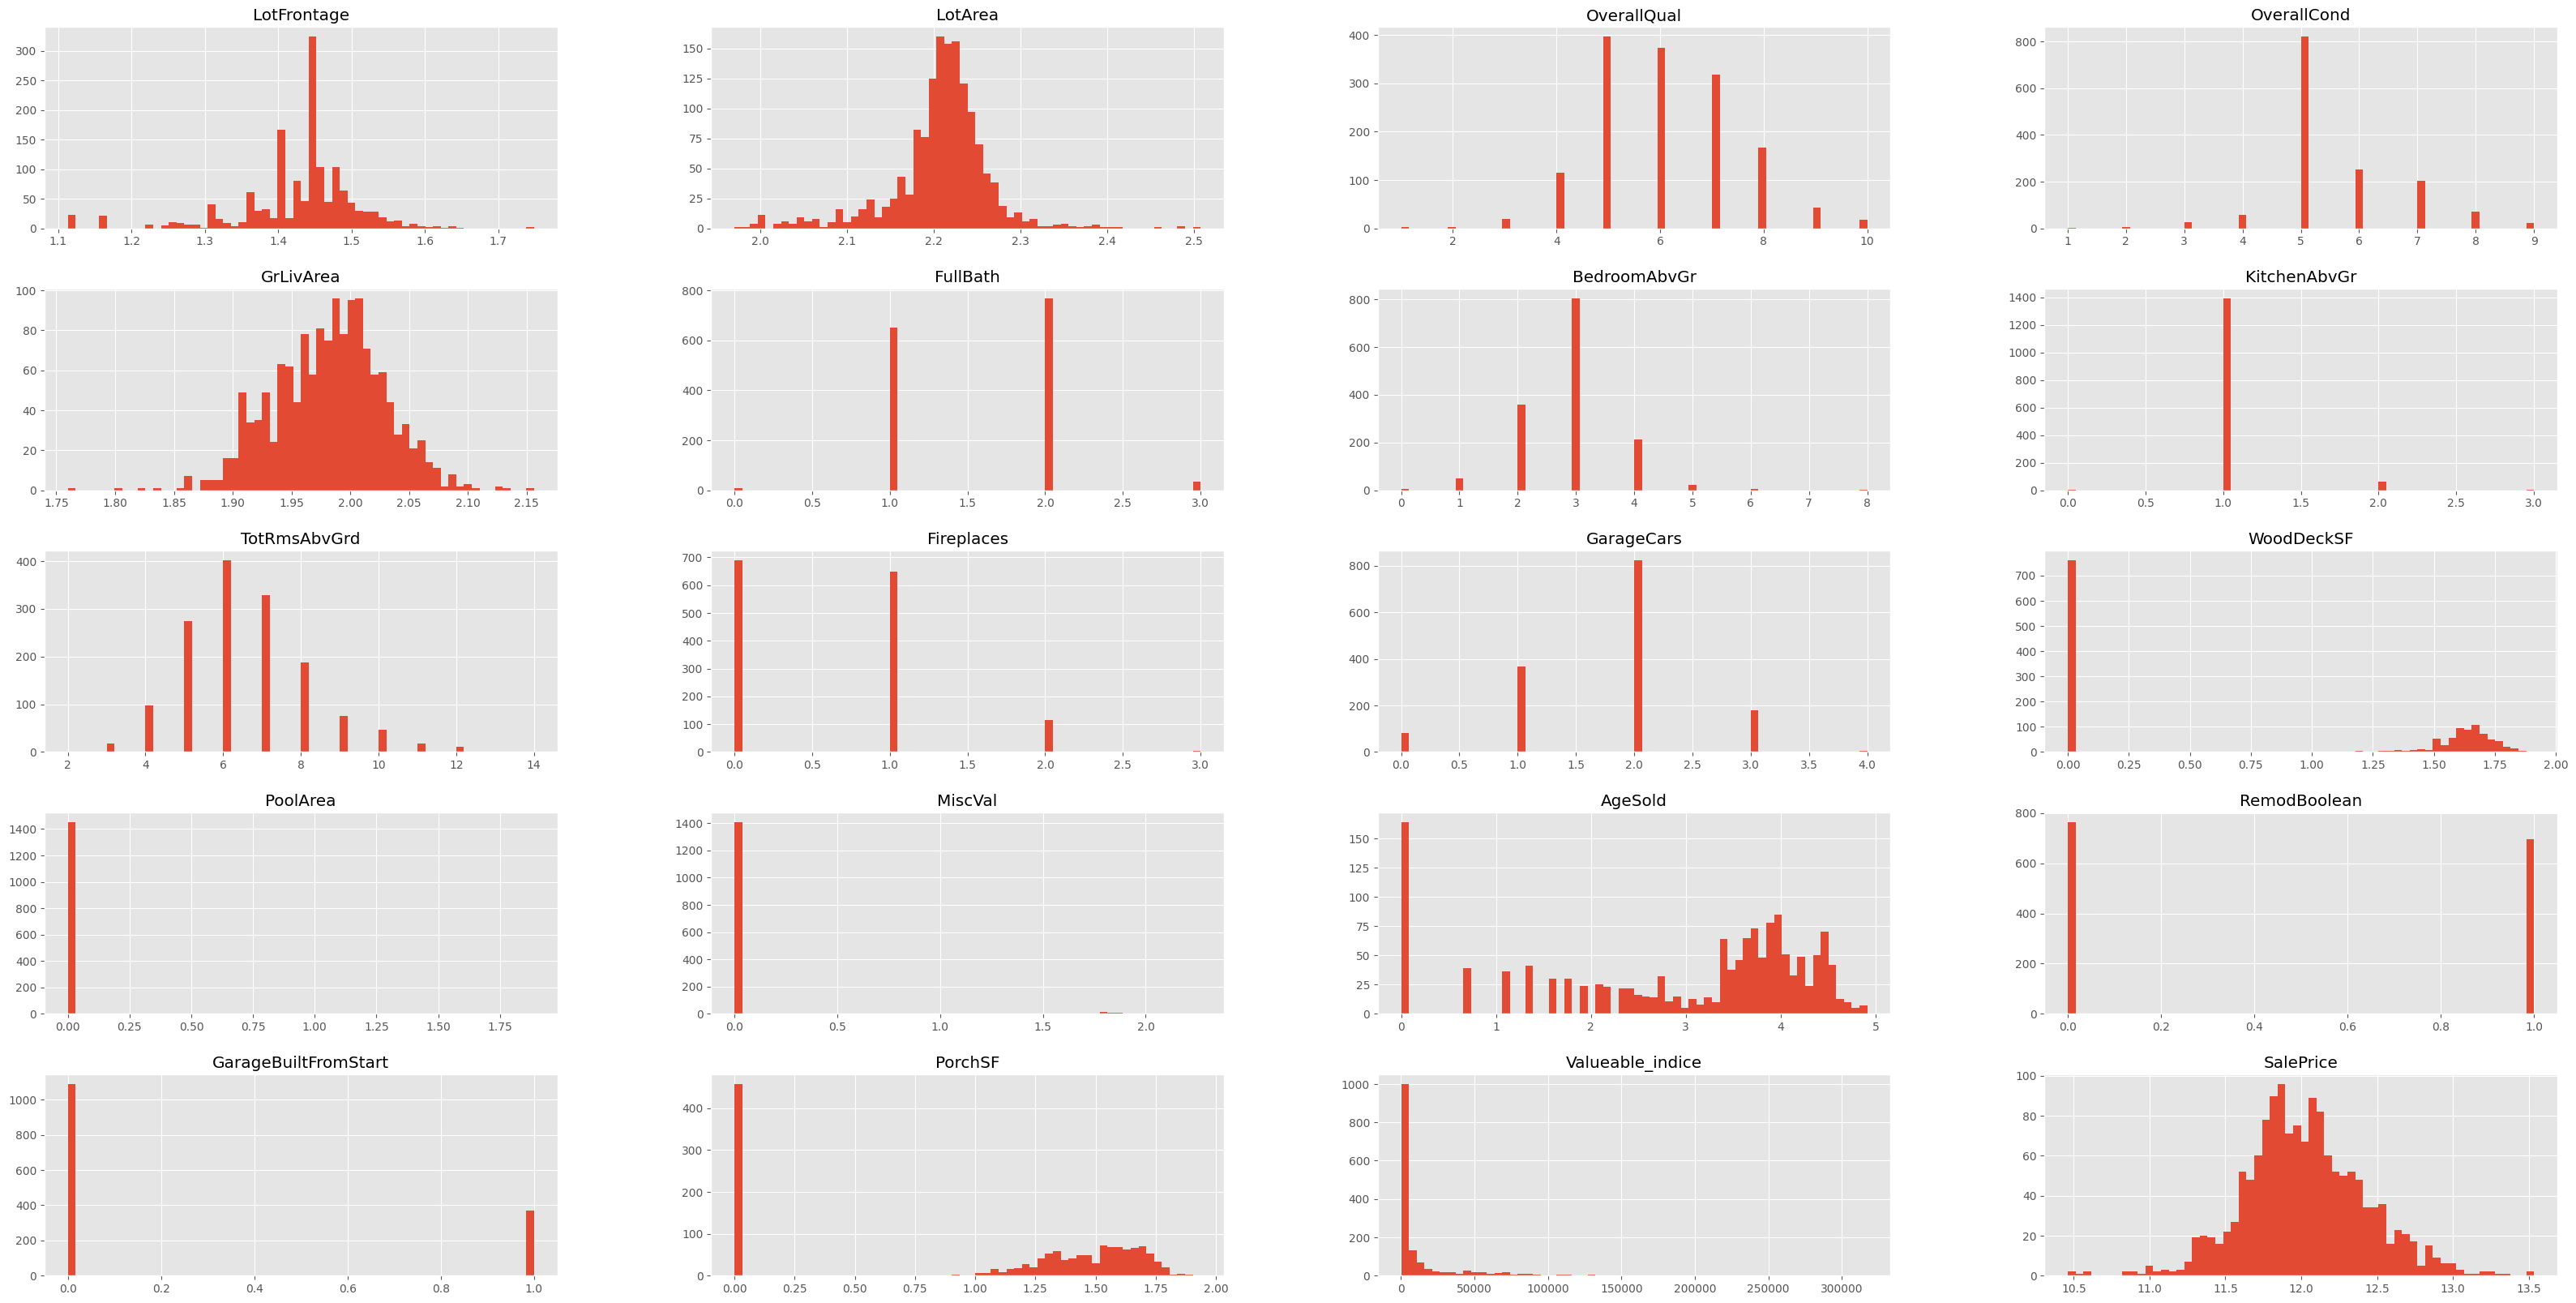

In [256]:
Numerical_DF_train.hist(bins = 60, figsize = (40,20))
plt.show()

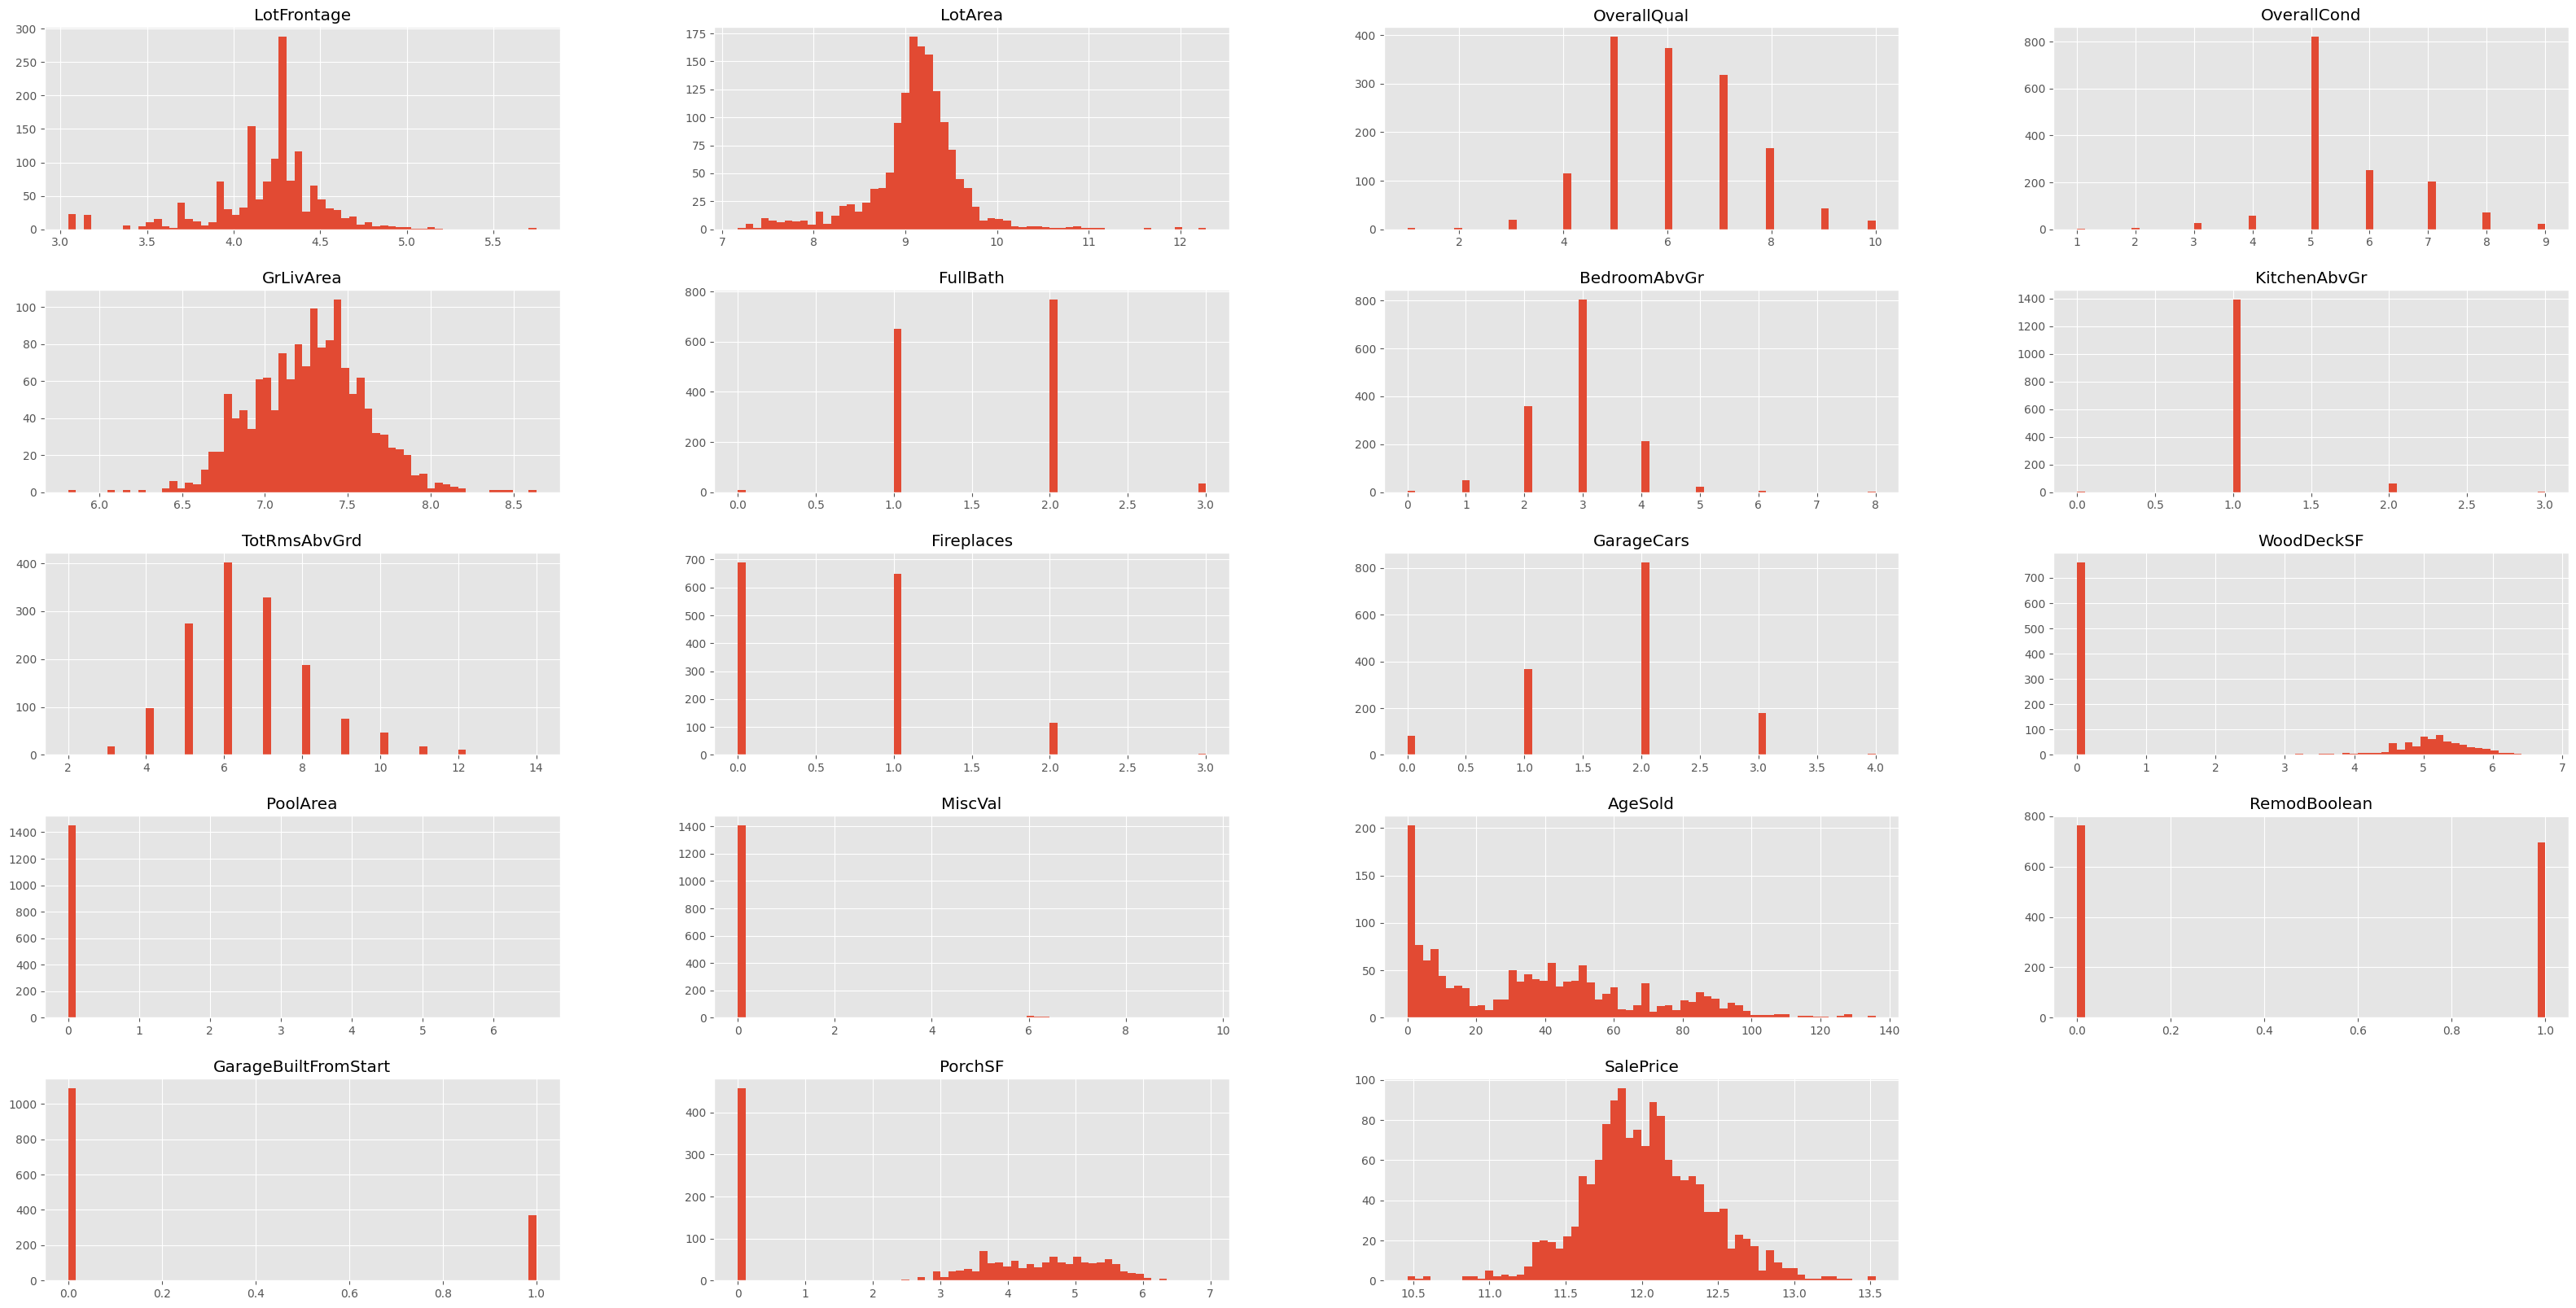

In [212]:
Numerical_DF_train.hist(bins = 60, figsize = (40,20))
plt.show()

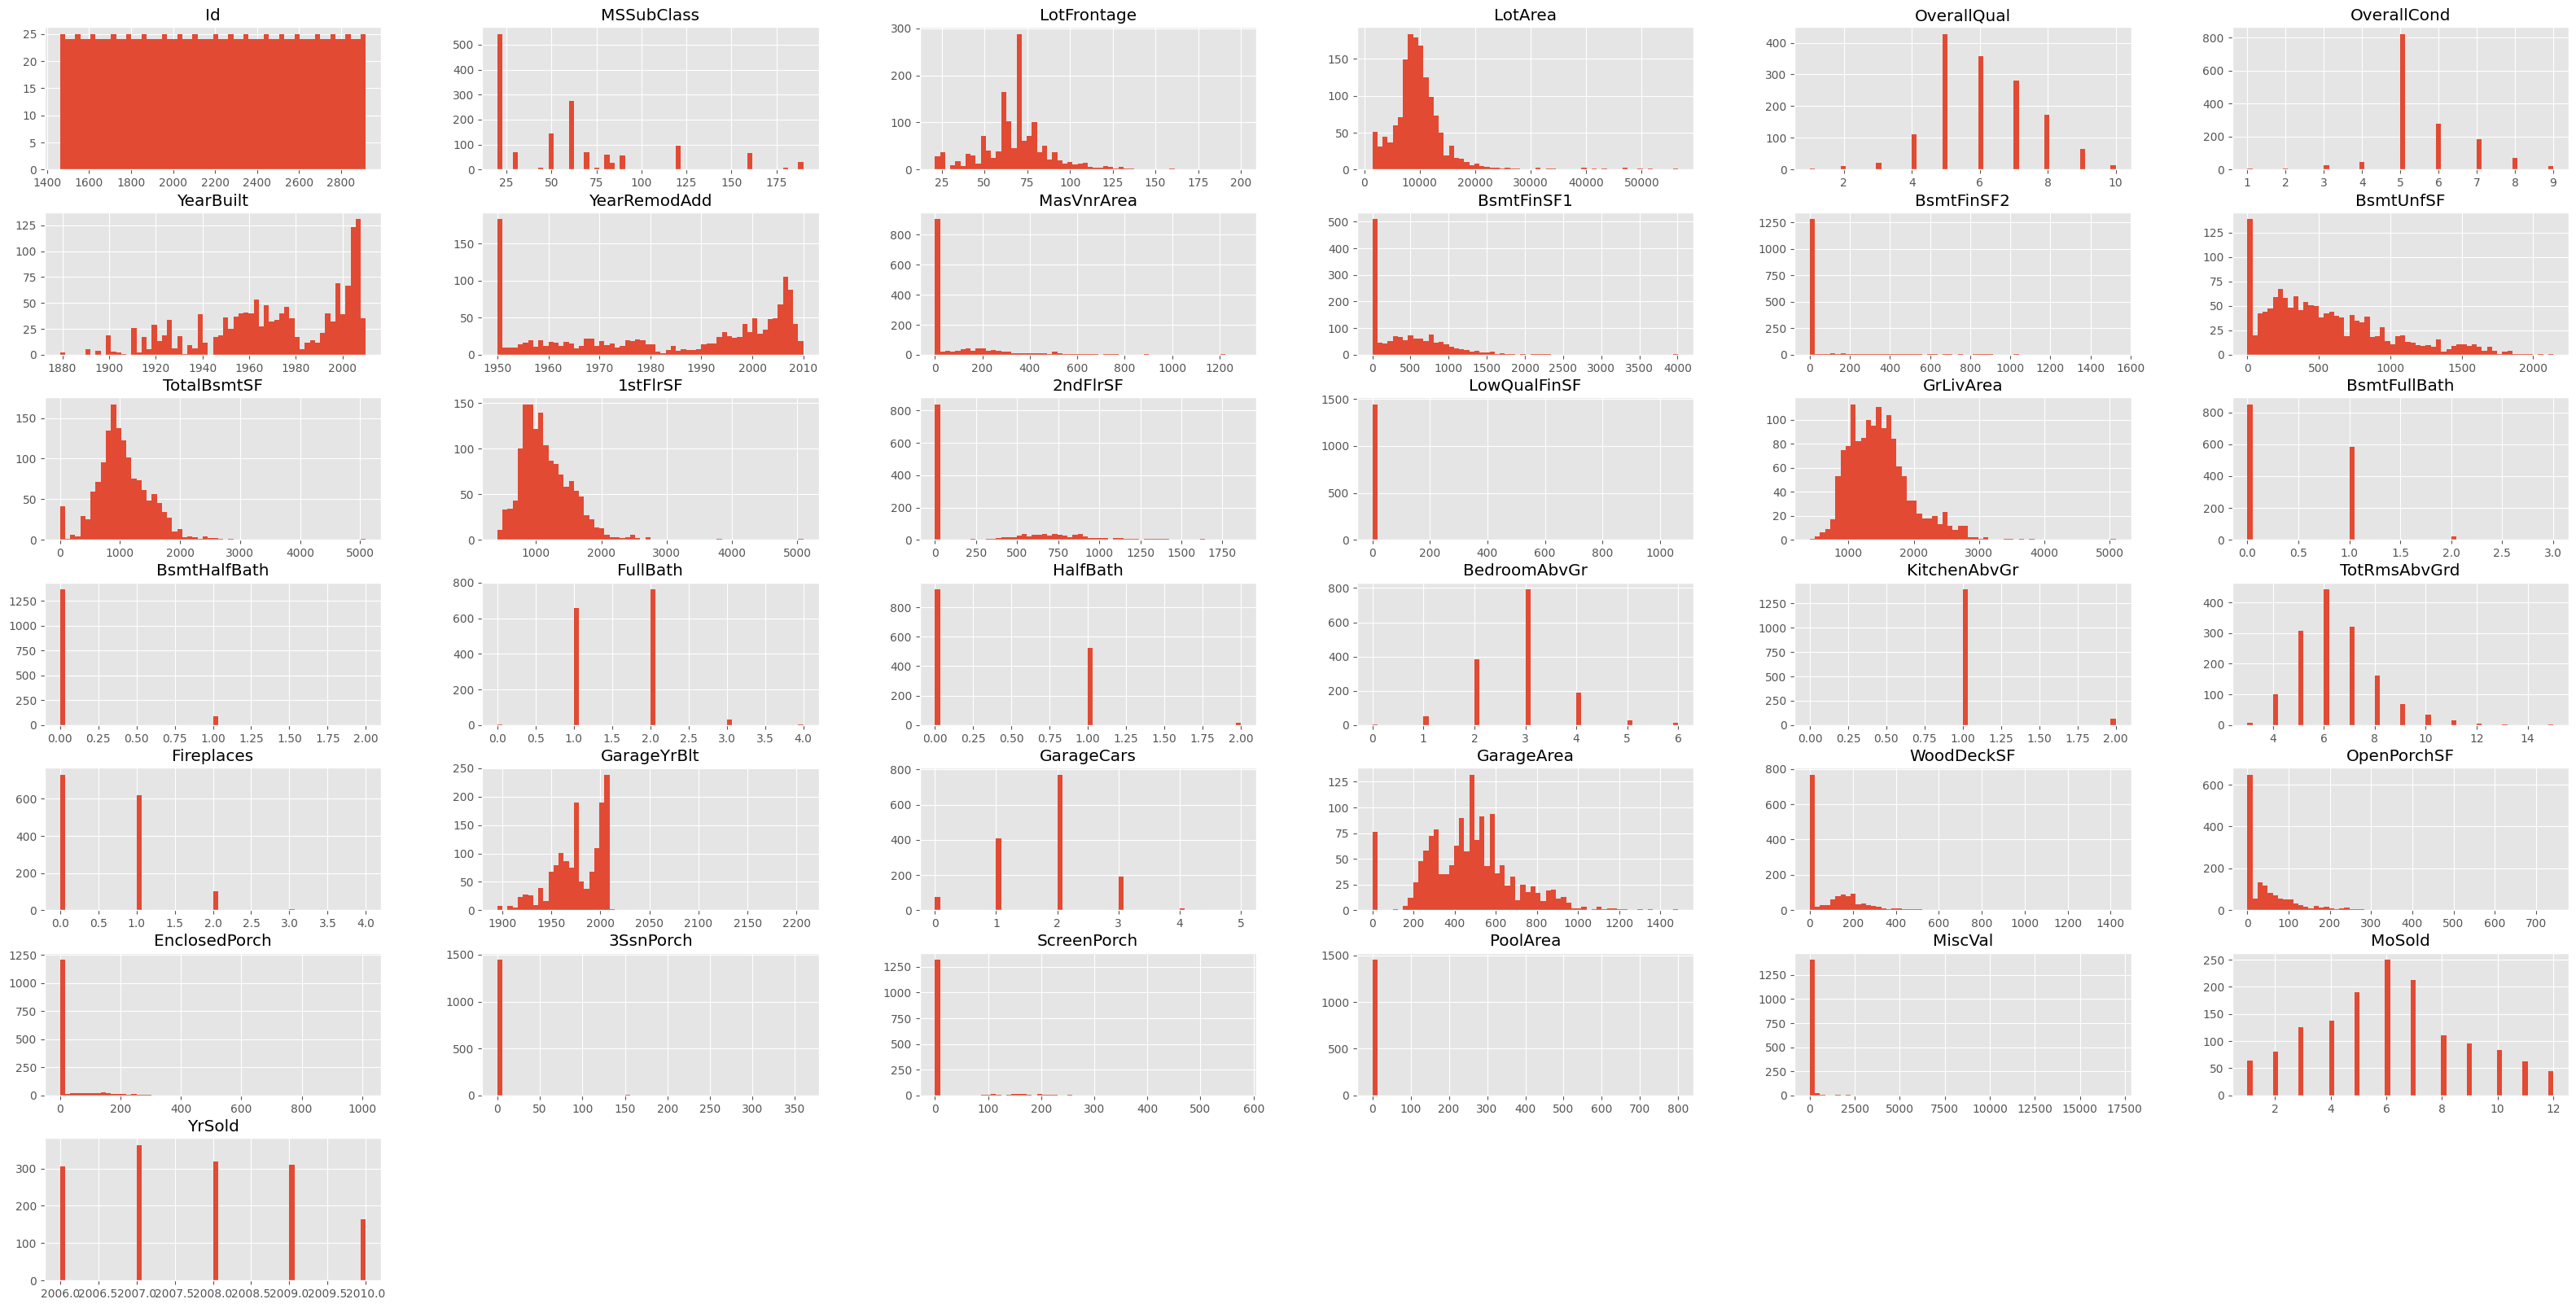

In [213]:
Numerical_DF_test.hist(bins = 60, figsize = (40,20))
plt.show()

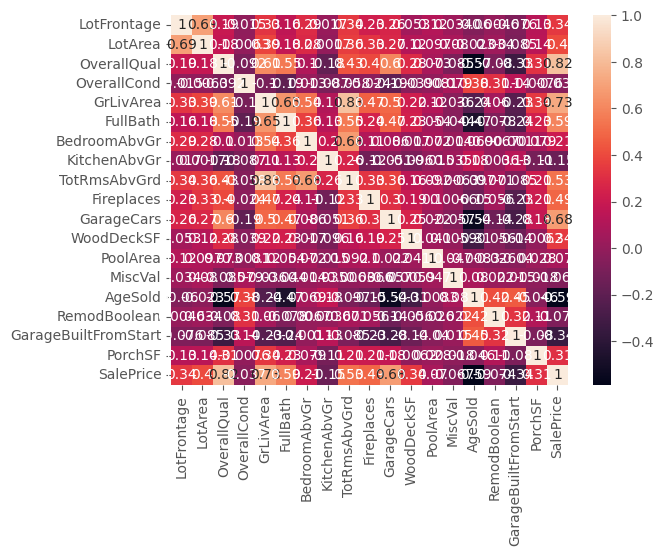

In [214]:
sns.heatmap(Numerical_DF_train.select_dtypes(exclude='object').corr(), annot=True)
plt.rcParams['figure.figsize'] = (40,15)

plt.show()

In [215]:
Numerical_DF_train.corr()

,LotFrontage,LotArea,OverallQual,OverallCond,GrLivArea,FullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,WoodDeckSF,PoolArea,MiscVal,AgeSold,RemodBoolean,GarageBuiltFromStart,PorchSF,SalePrice
LotFrontage,1.000000,0.694329,0.191047,-0.015486,0.327865,0.157444,0.292915,0.016672,0.342254,0.225437,0.257862,0.052664,0.117404,0.034208,-0.060472,0.004596,-0.075771,0.129024,0.340336
LotArea,0.694329,1.000000,0.178215,-0.006305,0.385435,0.179187,0.279176,0.001678,0.360129,0.327754,0.272007,0.123109,0.097249,0.080300,-0.023095,0.033936,-0.085375,0.141116,0.399918
OverallQual,0.191047,0.178215,1.000000,-0.091932,0.614210,0.550600,0.101676,-0.183882,0.427452,0.396765,0.600671,0.283366,0.072648,-0.085121,-0.572629,-0.080468,-0.331153,0.312398,0.817184
OverallCond,-0.015486,-0.006305,-0.091932,1.000000,-0.101965,-0.194149,0.012980,-0.087001,-0.057583,-0.023820,-0.185758,-0.039124,-0.008083,0.079264,0.377325,0.308884,0.138896,-0.007586,-0.036868
GrLivArea,0.327865,0.385435,0.614210,-0.101965,1.000000,0.653160,0.538848,0.111911,0.825498,0.468915,0.496132,0.218924,0.118575,-0.035610,-0.236510,0.060215,-0.226267,0.337261,0.730255
FullBath,0.157444,0.179187,0.550600,-0.194149,0.653160,1.000000,0.363252,0.133115,0.554784,0.243671,0.469672,0.231340,0.054067,-0.044086,-0.468403,-0.077909,-0.240391,0.232399,0.594771
BedroomAbvGr,0.292915,0.279176,0.101676,0.012980,0.538848,0.363252,1.000000,0.198597,0.676620,0.107570,0.086106,0.017476,0.072028,0.014347,0.068960,0.006657,-0.001124,0.079255,0.209044
KitchenAbvGr,0.016672,0.001678,-0.183882,-0.087001,0.111911,0.133115,0.198597,1.000000,0.256045,-0.123936,-0.050634,-0.096177,-0.014673,0.035342,0.175918,0.003633,0.134166,-0.106793,-0.147548
TotRmsAbvGrd,0.342254,0.360129,0.427452,-0.057583,0.825498,0.554784,0.676620,0.256045,1.000000,0.326114,0.362289,0.155948,0.092345,-0.006305,-0.096955,0.070562,-0.084884,0.213025,0.534422
Fireplaces,0.225437,0.327754,0.396765,-0.023820,0.468915,0.243671,0.107570,-0.123936,0.326114,1.000000,0.300789,0.189250,0.102078,0.006578,-0.148544,0.056056,-0.229230,0.206410,0.489449


In [257]:
Categorical_DF_train = DF_train.select_dtypes(include='object')
Categorical_DF_test = DF_test.select_dtypes(include='object')

In [ ]:
Categorical_DF_train.isna().sum().sort_values(ascending=False)
Categorical_DF_test.isna().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
MasVnrType        872
FireplaceQu       690
GarageType         81
GarageCond         81
GarageQual         81
GarageFinish       81
BsmtFinType2       38
BsmtExposure       38
BsmtFinType1       37
BsmtQual           37
BsmtCond           37
Electrical          1
KitchenQual         0
CentralAir          0
Functional          0
HeatingQC           0
Heating             0
PavedDrive          0
SaleType            0
MSZoning            0
Street              0
Condition2          0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
BldgType            0
Foundation          0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
ExterQual           0
ExterCond           0
SaleCondition       0
dtype: int64

In [264]:
# 1. Identify Columns with NaNs
nan_cols_train = Categorical_DF_train.columns[Categorical_DF_train.isna().any()].tolist()
nan_cols_test = Categorical_DF_test.columns[Categorical_DF_test.isna().any()].tolist()

# 2. Unite the Lists
all_nan_cols = list(set(nan_cols_train + nan_cols_test))  # Using set to avoid duplicates

# 3. Drop Columns
Categorical_DF_train = Categorical_DF_train.drop(all_nan_cols, axis=1)
Categorical_DF_test = Categorical_DF_test.drop(all_nan_cols, axis=1)

# Verification (optional)
print("Columns dropped from train:", nan_cols_train)
print("Columns dropped from test:", nan_cols_test)
print("Combined columns dropped:", all_nan_cols)

Columns dropped from train: ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
Columns dropped from test: ['MSZoning', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']
Combined columns dropped: ['Electrical', 'Exterior1st', 'BsmtFinType2', 'MiscFeature', 'Alley', 'GarageQual', 'GarageType', 'Functional', 'MasVnrType', 'KitchenQual', 'BsmtExposure', 'BsmtQual', 'BsmtFinType1', 'Utilities', 'PoolQC', 'Exterior2nd', 'GarageFinish', 'Fence', 'FireplaceQu', 'BsmtCond', 'GarageCond', 'SaleType', 'MSZoning']


In [268]:
Categorical_DF_train.columns


Index(['Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond', 'Foundation',
       'Heating', 'HeatingQC', 'CentralAir', 'PavedDrive', 'SaleCondition'],
      dtype='object')

In [269]:
Categorical_DF_train

,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,ExterQual,ExterCond,Foundation,Heating,HeatingQC,CentralAir,PavedDrive,SaleCondition
0,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,Gd,TA,PConc,GasA,Ex,Y,Y,Normal
1,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,TA,TA,CBlock,GasA,Ex,Y,Y,Normal
2,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,Gd,TA,PConc,GasA,Ex,Y,Y,Normal
3,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,TA,TA,BrkTil,GasA,Gd,Y,Y,Abnorml
4,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,Gd,TA,PConc,GasA,Ex,Y,Y,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Pave,Reg,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,TA,TA,PConc,GasA,Ex,Y,Y,Normal
1456,Pave,Reg,Lvl,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,TA,TA,CBlock,GasA,TA,Y,Y,Normal
1457,Pave,Reg,Lvl,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Ex,Gd,Stone,GasA,Ex,Y,Y,Normal
1458,Pave,Reg,Lvl,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,TA,TA,CBlock,GasA,Gd,Y,Y,Normal


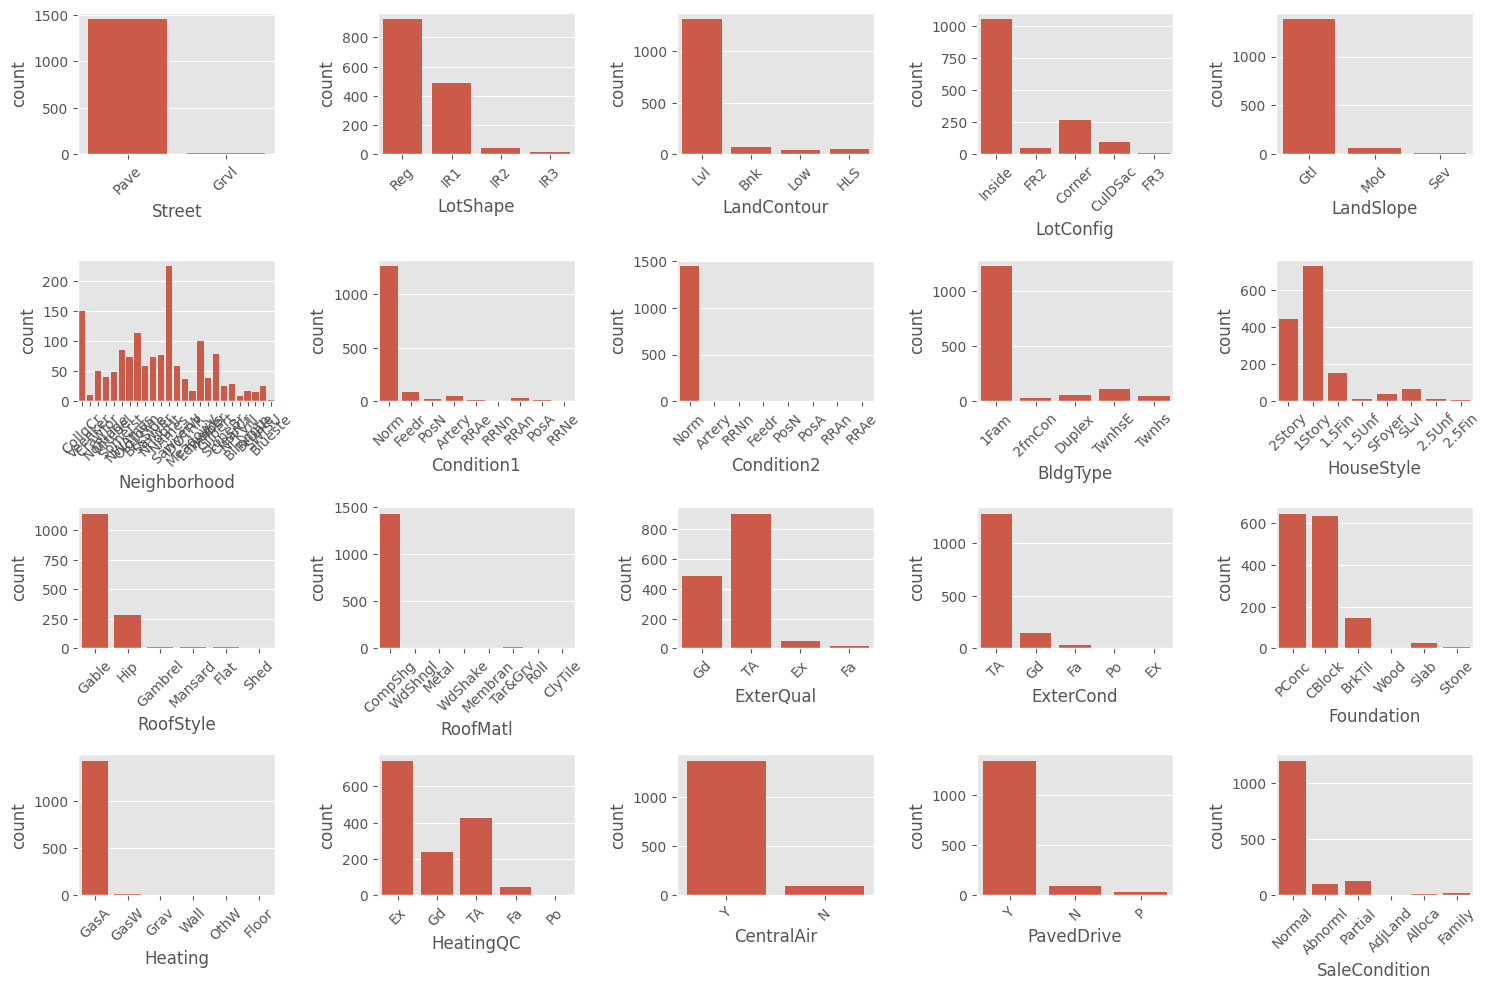

In [276]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Assuming Categorical_DF_train is your DataFrame

# Get the list of categorical column names
categorical_cols = Categorical_DF_train.columns.tolist()

# Calculate the number of features and determine grid dimensions
n_features = len(categorical_cols)
n_cols = math.ceil(math.sqrt(n_features))  # Number of columns (square-ish grid)
n_rows = math.ceil(n_features / n_cols)    # Number of rows

# Create the figure and subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10)) 
axes = axes.flatten() # Flatten the axes array to easily iterate

# Plot each feature using countplot
for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=Categorical_DF_train, ax=axes[i])
    
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels if needed

# Hide empty subplots if any
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [277]:
merged_df_train = pd.merge(Numerical_DF_train, Categorical_DF_train, left_index=True, right_index=True) 
merged_df_train

,LotFrontage,LotArea,OverallQual,OverallCond,GrLivArea,FullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,WoodDeckSF,PoolArea,MiscVal,AgeSold,RemodBoolean,GarageBuiltFromStart,PorchSF,Valueable_indice,SalePrice,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,ExterQual,ExterCond,Foundation,Heating,HeatingQC,CentralAir,PavedDrive,SaleCondition
0,1.428968,2.201872,7,5,2.007442,2,3,1,8,0,2,0.000000,0.0,0.000000,1.609438,0,0,1.413636,12312.000000,12.247694,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,Gd,TA,PConc,GasA,Ex,Y,Y,Normal
1,1.477511,2.215885,6,8,1.965776,2,3,1,6,1,2,1.739956,0.0,0.000000,3.433987,0,0,0.000000,1994.774194,12.109011,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,TA,TA,CBlock,GasA,Ex,Y,Y,Normal
2,1.439718,2.233034,7,5,2.013266,2,3,1,6,1,2,0.000000,0.0,0.000000,1.945910,1,0,1.318462,9185.142857,12.317167,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,Gd,TA,PConc,GasA,Ex,Y,Y,Normal
3,1.409607,2.215315,7,5,2.007990,1,3,1,7,1,3,0.000000,0.0,0.000000,4.510860,1,1,1.745165,679.252747,11.849398,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,TA,TA,BrkTil,GasA,Gd,Y,Y,Abnorml
4,1.488584,2.258133,8,5,2.040610,2,4,1,9,1,3,1.659655,0.0,0.000000,2.079442,0,0,1.488584,11608.187500,12.429216,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,Gd,TA,PConc,GasA,Ex,Y,Y,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.417583,2.194640,6,5,2.002386,2,3,1,7,1,2,0.000000,0.0,0.000000,2.079442,1,0,1.305323,6227.718750,12.072541,Pave,Reg,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,TA,TA,PConc,GasA,Ex,Y,Y,Normal
1456,1.491251,2.249825,6,6,2.032972,2,3,1,7,2,2,1.767308,0.0,0.000000,3.465736,1,0,0.000000,2332.125000,12.254863,Pave,Reg,Lvl,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,TA,TA,CBlock,GasA,TA,Y,Y,Normal
1457,1.432618,2.209333,7,9,2.048712,2,4,1,9,2,1,0.000000,0.0,2.057202,4.234107,1,0,1.409607,2170.434783,12.493130,Pave,Reg,Lvl,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Ex,Gd,Stone,GasA,Ex,Y,Y,Normal
1458,1.439718,2.217205,5,6,1.943459,1,2,1,5,0,1,1.775399,0.0,0.000000,4.094345,1,0,1.551491,543.491667,11.864462,Pave,Reg,Lvl,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,TA,TA,CBlock,GasA,Gd,Y,Y,Normal


In [279]:
# Identify categorical columns (adjust if you know them specifically)
categorical_cols = merged_df_train.select_dtypes(include=['object']).columns

# Initialize the TargetEncoder
encoder = TargetEncoder(cols=categorical_cols)

# Fit and transform the categorical columns directly in merged_df_train
merged_df_train[categorical_cols] = encoder.fit_transform(merged_df_train[categorical_cols], merged_df_train['SalePrice'])